In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\A can\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_excel('./materical_group2.xlsx')
df

,Unnamed: 0,Unnamed: 0.1,material_group_code,material_group_name,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,money1,money2,money3,money4,money5,money6,money7,money8,money9,risk_label,money_label,risk_score,money_score
0,0,0,1,材料组1,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,21,86,466,287,536,206,191,747,524,0,0,11180,3064
1,1,1,2,材料组2,685,990,489,765,665,857,713,869,425,474,645,656,697,100,33,291,28,768,78,24,608,936,62,745,836,307,207,302,386,709,745,87,105,1,0,12603,3684
2,2,2,3,材料组3,983,750,328,773,855,778,327,351,659,98,249,844,549,676,847,966,404,855,715,113,332,452,990,737,438,654,612,250,712,344,706,20,68,1,0,14631,3804
3,3,3,4,材料组4,638,428,5,480,436,227,950,63,749,696,464,485,409,669,811,701,275,711,666,705,821,391,417,90,700,767,430,803,794,235,374,540,551,1,0,12287,5194
4,4,4,5,材料组5,74,364,749,692,208,554,644,933,219,901,992,887,489,177,725,745,95,845,254,941,35,61,272,856,18,625,386,407,505,759,72,192,579,1,0,12712,3543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,396,材料组396,318,132,770,440,586,717,223,802,7,440,762,646,935,614,800,736,942,510,772,506,970,110,495,487,626,70,859,302,139,502,467,425,465,1,0,13720,3855
396,396,396,397,材料组397,412,876,773,289,688,651,454,64,311,105,17,132,587,958,876,19,992,42,44,754,198,207,74,61,226,139,451,564,229,407,117,698,853,0,0,9584,3684
397,397,397,398,材料组398,312,916,442,408,696,558,323,283,619,418,603,445,142,907,701,362,859,461,44,176,945,553,788,945,288,907,457,147,253,185,471,892,757,1,0,12906,4357
398,398,398,399,材料组399,288,34,776,870,657,708,316,705,951,945,851,612,687,865,761,142,352,527,524,662,904,736,576,818,724,686,847,107,824,988,141,779,148,1,0,15267,5244


In [3]:
data_material_group_name = df['material_group_name']

In [4]:
df.drop(['risk_score','money_score'],axis=1, inplace=True)

In [5]:
# 在风险性和重要性两个维度建立两个逻辑回归模型

In [6]:
# risk_x risk_y  money_x money_y
# 切分数据集 train_test_split(random_state=33) 控制切分集不随机
# 引入评分卡woe
# 对字段进行分类
# 构建评分卡规则 variable binning score
# 根据 risk_score和money_score两个维度画波士顿矩阵BCG

### 构建两个逻辑回归的x和y：risk_x risk_y  money_x money_y

In [7]:
# risk_cols = [x for x in df.columns if x[:4]=='risk']
# risk_cols = risk_cols.remove('risk_label')
# x_risk_cols = risk_cols.remove('risk_score')

risk_cols = ['risk' + str(x) for x in range(1,25)]
x_risk = df[risk_cols]
y_risk = df['risk_label']


money_cols = ['money' + str(x) for x in range(1,10)]
x_money = df[money_cols]
y_money = df['money_label']

In [8]:
# 切分数据集 train_test_split(random_state=33) 控制切分集不随机

In [9]:
from sklearn.utils import shuffle
X_money_shuffle, y_money_shuffle = shuffle(x_money, y_money)

In [10]:
# from sklearn.model_selection import train_test_split
x_risk_train, x_risk_test, y_risk_train, y_risk_test = train_test_split(x_risk, df['risk_label'],test_size=0.1, random_state=33)

In [11]:
x_money_train, x_money_test, y_money_train, y_money_test = train_test_split(x_money, df['money_label'],test_size=0.1, random_state=33)
# x_money_test.shape (10,9)   y_money_test.shape (10,)

In [12]:
y_money_train

79     0
331    0
223    0
258    0
306    0
      ..
146    0
66     0
216    0
391    0
20     0
Name: money_label, Length: 360, dtype: int64

### 逻辑回归：对风险性（risk）进行建模

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

C=0.2
max_iter = 150

model_risk = LogisticRegression(C=C, max_iter=max_iter, penalty='l2', tol=0.0001, class_weight='balanced') # penalty='l2' l2正则 tol=0.0001
model_risk.fit(x_risk_train, y_risk_train)
y_risk_pred = model_risk.predict(x_risk_test)
accuracy = accuracy_score(y_risk_test, y_risk_pred)
f1 = f1_score(y_risk_test, y_risk_pred)
print(accuracy)

0.925


In [14]:
# 使用交叉验证的方式对模型进行评估
from sklearn.model_selection import cross_val_score
cross_val_score(model_risk,x_risk_train,y_risk_train,cv=5,scoring='accuracy').mean()

0.9555555555555555

In [15]:
set(y_money_train)

{0, 1}

In [16]:
'''由于贝叶斯调参包的不稳定性，使用GridSearchCV调参'''
'''
# 贝叶斯优化进行参数调整
def lr_risk_cv(C, max_iter):
    results = cross_val_score(model_risk, x_risk,y_risk,cv=5, scoring='accuracy').mean()
    return results

from bayes_opt import BayesianOptimization
lr_risk_op = BayesianOptimization(
    f = lr_risk_cv,
    pbounds = {'C':(0.01, 20),
              'max_iter':(30,600)})
lr_risk_op.maximize(init_points=2, n_iter=3, acq='ei')
print(lr_risk_op)

# ValueError: array must not contain infs or NaNs
'''

"\n# 贝叶斯优化进行参数调整\ndef lr_risk_cv(C, max_iter):\n    results = cross_val_score(model_risk, x_risk,y_risk,cv=5, scoring='accuracy').mean()\n    return results\n\nfrom bayes_opt import BayesianOptimization\nlr_risk_op = BayesianOptimization(\n    f = lr_risk_cv,\n    pbounds = {'C':(0.01, 20),\n              'max_iter':(30,600)})\nlr_risk_op.maximize(init_points=2, n_iter=3, acq='ei')\nprint(lr_risk_op)\n\n# ValueError: array must not contain infs or NaNs\n"

In [17]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C':[0.1, 0.15, 0.2,0.22, 0.24, 0.25, 0.38],
              'max_iter':[30, 50, 100, 120, 150, 200],
    
}
grid_search_risk = GridSearchCV(model_risk, n_jobs=-1, 
                                param_grid=param_dist,
                                cv=5, 
                                scoring='accuracy',
                                verbose=5
            )
grid_search_risk.fit(x_risk_train, y_risk_train)
grid_search_risk.best_estimator_, grid_search_risk.best_score_
# model_risk :LogisticRegression(C=0.38, class_weight='balanced', max_iter=150), 0.8500000000000002

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   11.2s finished


(LogisticRegression(C=0.1, class_weight='balanced'), 0.9555555555555555)

In [18]:
y_money_train.shape

(360,)

### 逻辑回归：对金额数（money）进行建模

In [19]:
C = 0.085
max_iter = 60

model_money = LogisticRegression(C=C, max_iter=max_iter, penalty='l2', tol=0.0001, class_weight='balanced')
model_money.fit(x_money_train, y_money_train)
y_money_pred = model_money.predict(x_money_test)
accuracy = accuracy_score(y_money_pred, y_money_test)
print(accuracy)

0.825


### 网格搜索调参

In [20]:
param_dist = {'C':[0.08, 0.085, 0.09, 0.1],
             'max_iter':[30, 40, 50, 60, 70,80, 100]}
grid_search_money = GridSearchCV(model_money, n_jobs=-1,param_grid=param_dist, cv=3,scoring='accuracy',verbose=5)
grid_search_money.fit(x_money_train, y_money_train)
grid_search_money.best_estimator_, grid_search_money.best_score_, 

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    1.6s finished


(LogisticRegression(C=0.085, class_weight='balanced', max_iter=60),
 0.9527777777777778)

使用K折交叉验证对模型进行评价

In [21]:
cross_val_score(model_money, x_money,y_money,cv=5,scoring='accuracy').mean()
# cross_val_score(model_risk,x_risk,y_risk,cv=5,scoring='accuracy').mean()

0.915

## 评分卡规则转换

In [22]:
# 引入评分卡woe
# 对字段进行分类
# 构建评分卡规则 variable binning score
# 根据 risk_score和money_score两个维度画波士顿矩阵BCG

得到woe规则

In [23]:
# 有risk_label 和 自变量risk
# risk_cols = [i for i in df.columns if i.startswith('risk')]
money_cols = ['money' + str(x) for x in range(1, 10)]
# print(risk_cols)
x_money = df[money_cols]
y_money = df['money_label']

In [24]:
x_money.head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9
0,21,86,466,287,536,206,191,747,524


### 使用WOE+LR建模

等频：得到分箱字段

In [25]:
def get_bin_features(data, q=10):
    columns = data.columns
    for column in columns:
        data['bin_' + column] = pd.qcut(data[column], q=q, duplicates='drop') # 跨多个箱使用 duplicates='drop'
    return data

In [26]:
bin_cols = ['bin_money' + str(x) for x in range(1, 10)]
print(bin_cols)

['bin_money1', 'bin_money2', 'bin_money3', 'bin_money4', 'bin_money5', 'bin_money6', 'bin_money7', 'bin_money8', 'bin_money9']


In [27]:
'''在原始数据的基础上直接增加bin_risk字段，需要copy一份，分箱的字段单独放在一个表里面'''
x_data = x_money.copy()
y_data = y_money.copy()
get_bin_features(x_data).head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9
0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]"


In [28]:
def cal_IV(data, feature, target):
    lst = []
    cols = ['Variable','Value','All','Bad'] #value=feature=bin_age All是Value个数  Bad=bad个数
    for i in range(data[feature].nunique()): # nunique = unique的个数 比如：bin_age的 value值一共有6个。
        val = list(data[feature].unique())[i] # 第 i 个value：从feature字段中取出所有value的名字  eg:共6个 [(40.0, 50.0], (25.0, 40.0], (70.0, inf], (50.0, 60.0], (60.0, 70.0], (-inf, 25.0]]
        # 统计feature，feature_value, 这个value的个数，这个value导致target=1
        temp1 = data[data[feature]==val].count()[feature] # 在feature字段中找到其总数
        temp2 = data[(data[feature]==val) & (data[target]==1)].count()[feature]  # target=1的个数
#         print(feature, val, temp1, temp2) # 比如：bin_age (40.0, 50.0] 35037 2893 在bin_age字段中找到
        lst.append([feature, val, temp1, temp2])
#     print('lst',lst)   # temp1=All temp2=Bad

    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]
    data['Share'] = data['All'] / data['All'].sum() # share是每个 value的比例， 比如：(40.0, 50.0]的比例
    data['Bad_Rate'] = data['Bad'] / data['All'] # value导致bad的情况在这个value的比例： （40,50]中bad 占整个（40,50]的情况： 2893/35037
    data['Distribution_Bad'] = (data['Bad'] + 0.5) / data['Bad'].sum() #这个value导致bad 在所有bad中的情况
    data['Distribution_Good'] = (data['All'] - data['Bad'] + 0.5) / (data['All'].sum() - data['Bad'].sum()) # (35037-2893)/[data.All.sum() - data.Bad.sum()]
    data['WOE'] = np.log1p(data['Distribution_Bad'] / data['Distribution_Good'])
#     data['IV'] = ((data['Distribution_Bad'] - data['Distribution_Good']) * data['WOE']).sum()
    data['IV'] = (data['Distribution_Bad'] - data['Distribution_Good']) * data['WOE']
    
    data.sort_values(by=['Variable','Value'], ascending=True)
#     print(data)
    return data['IV'].sum() # 获得IV值

In [29]:
x_data.head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9
0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]"


In [30]:
# 计算 data中 bin字段的 IV 值，target为目标列
def cal_all_IV(data, target, threhold=0):
    result = {}
    for col in bin_cols:
        temp_IV = cal_IV(data, col, target)
        print(col, temp_IV)
        result[col] = temp_IV
    return result

In [31]:
# 计算各个 bin字段的IV值
x_data['money_target'] = y_data # 在DataFrame中增加一列的写法
cal_IVs = cal_all_IV(x_data, 'money_target')

bin_money1 0.31810661479461205
bin_money2 0.442926348055345
bin_money3 0.4426695351989419
bin_money4 0.44268382893606195
bin_money5 0.44302945163330804
bin_money6 0.31810661479461205
bin_money7 0.3332748962960003
bin_money8 0.31810661479461205
bin_money9 0.4426695351989419


In [32]:
# 返回IV值大于threshold的 bin字段名称
def cal_filtered_IV(cal_IVs, threshold=0.1):
    result = {k:v for k,v in cal_IVs.items() if v >= threshold}
    return result.keys() # 通过key拿到字典形式
'''result是元组内容 '''

'result是元组内容 '

In [33]:
col_filter = cal_filtered_IV(cal_IVs)
col_filter

dict_keys(['bin_money1', 'bin_money2', 'bin_money3', 'bin_money4', 'bin_money5', 'bin_money6', 'bin_money7', 'bin_money8', 'bin_money9'])

In [34]:
def cal_WOE(data, features, target):
    data_new = data
    for feature in features:
#         data_woe1 = data_new.groupby(feature).agg(['sum','count']) # 求出根据 feature 分组之后每组的 sum和 count
        # target:['sum','count'] 相当于 feature分组之后的众多组数中筛选出 target 的那组
        data_woe = data_new.groupby(feature).agg({target:['sum', 'count']}) # (-0.001, 1.0] sum=7420  count=108526
#         print(data_woe1)
#         print(data_woe.columns)
        # 查看 columns的名字，方便后面的重命名操作 columns={target+'sum'}
        data_woe.columns = list(map(''.join, data_woe.columns)) #做求和
#         print(data_woe.columns)  # [target+'sum' = SeriousDlqin2yrssum', 'SeriousDlqin2yrscount']
        
        data_woe = data_woe.reset_index().rename(columns={target+'sum':'bad', target+'count':'all'})
#         print(data_woe)

        data_woe['good'] = data_woe['all'] - data_woe['bad']
        data_woe = data_woe[[feature, 'good', 'bad']]
        # 为了避免分母为0 在 bad 和 good 
        data_woe['bad_rate'] = (data_woe['bad'] + 0.5) / data_woe['bad'].sum()
        data_woe['good_rate'] = (data_woe['good'] + 0.5) / data_woe['good'].sum()
        # 计算woe
#         data_woe['woe'] = data_woe['bad_rate'].divide(data_woe['good_rate'])
        data_woe['woe'] = np.log1p(data_woe['bad_rate'] / data_woe['good_rate'])
        # 在后面拼接上 _feature, 比如 _age
        data_woe.columns = [c if c==feature else c+'_'+feature for c in list(data_woe.columns.values)]
        # 拼接
        data_new = data_new.merge(data_woe, on=feature, how='left')
    return data_new

In [35]:
x_data.head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target
0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0


In [36]:
data_woe = cal_WOE(x_data, col_filter, 'money_target')
data_woe.head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target,good_bin_money1,bad_bin_money1,bad_rate_bin_money1,good_rate_bin_money1,woe_bin_money1,good_bin_money2,bad_bin_money2,bad_rate_bin_money2,good_rate_bin_money2,woe_bin_money2,good_bin_money3,bad_bin_money3,bad_rate_bin_money3,good_rate_bin_money3,woe_bin_money3,good_bin_money4,bad_bin_money4,bad_rate_bin_money4,good_rate_bin_money4,woe_bin_money4,good_bin_money5,bad_bin_money5,bad_rate_bin_money5,good_rate_bin_money5,woe_bin_money5,good_bin_money6,bad_bin_money6,bad_rate_bin_money6,good_rate_bin_money6,woe_bin_money6,good_bin_money7,bad_bin_money7,bad_rate_bin_money7,good_rate_bin_money7,woe_bin_money7,good_bin_money8,bad_bin_money8,bad_rate_bin_money8,good_rate_bin_money8,woe_bin_money8,good_bin_money9,bad_bin_money9,bad_rate_bin_money9,good_rate_bin_money9,woe_bin_money9
0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407,42,0,0.166667,0.107053,0.938781,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407,40,0,0.166667,0.102015,0.968407


In [37]:
# 得到IV大于0.1 的特征值的 woe
woe_cols = [c for c in data_woe.columns if 'woe' in c]
print(woe_cols)
data_woe[woe_cols].head(1)

['woe_bin_money1', 'woe_bin_money2', 'woe_bin_money3', 'woe_bin_money4', 'woe_bin_money5', 'woe_bin_money6', 'woe_bin_money7', 'woe_bin_money8', 'woe_bin_money9']


,woe_bin_money1,woe_bin_money2,woe_bin_money3,woe_bin_money4,woe_bin_money5,woe_bin_money6,woe_bin_money7,woe_bin_money8,woe_bin_money9
0,0.968407,0.968407,0.968407,0.968407,0.968407,0.938781,0.968407,0.968407,0.968407


In [38]:
# 得到 WOE 规则
def get_woe_rules(data_woe, feature_cols):
    data_bin_to_woe = pd.DataFrame(columns=['feature','bin','woe'])
    for f in feature_cols:
        b = 'bin_' + f
        w = 'woe_bin_' + f
        # 对每个feature找到相应的 bin字段和 woe字段
        data = data_woe[[w, b]].drop_duplicates()
        data.columns = ['woe', 'bin']
        data['feature'] = f
        data = data[['feature', 'bin', 'woe']]
        # 按照行的方式进行拼接
        data_bin_to_woe = pd.concat([data_bin_to_woe, data])
    return data_bin_to_woe

In [39]:
feature_cols = [x[4:] for x in col_filter]
print(feature_cols)
data_bin_to_woe = get_woe_rules(data_woe, feature_cols)
data_bin_to_woe.head(1)

['money1', 'money2', 'money3', 'money4', 'money5', 'money6', 'money7', 'money8', 'money9']


,feature,bin,woe
0,money1,"(0.999, 62.8]",0.968407


### 逻辑回归建模型

In [40]:
x_train = x_money_train
y_train = y_money_train

In [41]:
C, max_iter = 0.18, 80
model = LogisticRegression(C=C, max_iter=max_iter, 
                           random_state=50, 
                           penalty='l2', 
                           tol=0.0001,
                           class_weight='balanced').fit(x_train, y_train)
# random_state保证每次结果都一样 # 样本不均衡 设置class_weight

'''使用交叉验证进行模型评估（cv=5折）'''
print('f1 score', cross_val_score(model, x_train, y_train, cv=5, scoring='f1').mean())
print('accuracy', cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean())
# print(model.score(x_test, y_test))

f1 score 0.0
accuracy 0.9277777777777778


In [42]:
# 调节参数
param_grid = {'C':[0.1, 0.15,0.18,0.19, 0.2],
              'max_iter':[50, 70, 80, 90]}

grid_search = GridSearchCV(model_risk, n_jobs=-1,
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy',
                          verbose=5)
grid_search.fit(x_train, y_train)
grid_search.best_estimator_, grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


(LogisticRegression(C=0.18, class_weight='balanced', max_iter=80),
 0.9277777777777778)

In [43]:
model.coef_

array([[-0.00978073, -0.01033709, -0.01093846, -0.00955337, -0.00112355,
        -0.0053023 , -0.01265264, -0.01608965,  0.00366268]])

In [119]:
col_filter

dict_keys(['bin_money1', 'bin_money2', 'bin_money3', 'bin_money4', 'bin_money5', 'bin_money6', 'bin_money7', 'bin_money8', 'bin_money9'])

1）生成评分卡generate_scorecard

In [120]:
A = 10
B = 100/np.log(2) # 50 / np.log(2)

# 评分卡模型
def generate_scorecard(model_coef, binning_df, features, B):
    '''
    binning_df
    features   bin    woe
         age (40,50]  0.8137
         
    features
    ['age',
     'NumberOfTime30-59DaysPastDueNotWorse',
    '''
    lst = []
    cols = ['Variable','Binning','Score'] # variable是变量， binning是 (40,50]  Score是分数
    # 模型系数
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]   # risk8 risk 15 risk16 risk 23
        # 得到这个feature的 woe规则
        df = binning_df[binning_df['feature'] == f]
        for index, row in df.iterrows():
            # coef_[i]为正数，woe
#             print('测试',-coef[i], row.woe, B, float(-coef[i]*row['woe']*B))
#             lst.append([f, row['bin'], float(round(-coef[i]*row['woe']*B, -5))])
            lst.append([f, row['bin'], float(-coef[i]*row['woe']*B)])
    data = pd.DataFrame(lst, columns = cols)
    return data
'''print(df) feature             bin       woe
           0   risk8  (0.999, 201.8]  0.516910'''

'print(df) feature             bin       woe\n           0   risk8  (0.999, 201.8]  0.516910'

In [121]:
'''['bin_risk8', ...] => ['risk8', ...]'''
feature_cols = [x[4:] for x in col_filter] # feature_cols 是 IV>0.1的值
score_card = generate_scorecard(model.coef_, data_bin_to_woe, feature_cols, B)
score_card#.head(1)

,Variable,Binning,Score
0,money1,"(0.999, 62.8]",1.366482
1,money1,"(790.0, 890.1]",1.388469
2,money1,"(426.5, 519.0]",1.366482
3,money1,"(646.6, 790.0]",1.345231
4,money1,"(321.6, 426.5]",1.366482
...,...,...,...
85,money9,"(797.0, 916.3]",-0.960339
86,money9,"(198.8, 279.7]",-0.511719
87,money9,"(704.5, 797.0]",-0.503761
88,money9,"(916.3, 997.0]",-0.511719


In [122]:
# 对于每个字段按照降序排序，查看规则
sort_scorecard  = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=True))
sort_scorecard#.head(1)
# data.sort_values(by=['Variable','Value'], ascending=True)

Variable         Binning     Score
Variable                                      
money1   3    money1  (646.6, 790.0]  1.345231
         6    money1  (151.0, 218.0]  1.345231
         0    money1   (0.999, 62.8]  1.366482
         2    money1  (426.5, 519.0]  1.366482
         4    money1  (321.6, 426.5]  1.366482
...              ...             ...       ...
money9   84   money9  (383.6, 464.0] -0.511719
         86   money9  (198.8, 279.7] -0.511719
         88   money9  (916.3, 997.0] -0.511719
         82   money9   (2.999, 92.0] -0.503761
         87   money9  (704.5, 797.0] -0.503761

[90 rows x 3 columns]

2）把变量放到对应的分箱中，方便后面计算

In [123]:
def str_to_int(s):
    if s=='-inf':
        return -999999
    if s=='inf':
        return 999999
    return float(s)

# 将value影响到bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index,row in feature_to_bin.iterrows(): #遍历行数据的时候，就可以使用 iterrows()方法实现了
        '''(40.0, 50.0] => ['40.0', ' 50.0']'''
        bins = str(row['Binning'])  # (40.0, 50.0]
#         print('bins',bins)
        left_open = bins[0] == '('    # 输出布尔值：left_open True
#         print('left_open',left_open)
        right_open = bins[-1] == ')'    # 输出布尔值：right_open False
#         print('right open',right_open)
        binnings = bins[1: -1].split(',')  # ['40.0', ' 50.0']  字符串 ( 40.0 , 50.0 ] 中取 40.0 , 50.0 3个
        # [a:-1]是从列表的第二个数到倒数第二个数（包含） [1,2,3,4,5,6,7,8,9] 里面的2-8
#         print('binnings',binnings)
        
        in_range = True
        temp = str_to_int(binnings[0]) # 把 -np.inf字符串转为数字 -999999
        temp2 = str_to_int(binnings[1])
        # 检查左括号
        if left_open:     # left_open的值是 True  = (
            if feature_value <= temp: # -999999.9 <= -999999
                in_range = False
        else:             # left_open的值是 False = [
            if feature_value < temp:
                in_range = False
        # 检查有括号
        if right_open:    # right_open的值是 True  = (
            if feature_value >= temp2: # feature_value >= 999999
                in_range = False
        else:             # right_open的值是 True  = [
            if feature_value > temp2:
                in_range = False
        if in_range:
            return row['Binning']  # row['Binning'] = (70.0, inf]

3）将分箱中的变量计算得到一个分数

In [124]:
def map_to_score(data, score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable'] == col]
        feature_value = data[col]
        selected_bin = map_value_to_bin(feature_value, feature_to_bin)
        temp_score = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += temp_score['Score'].values[0]
    return score

4）计算得分，输入：一张数据表，得到一个分数

In [125]:
def cal_score(data, score_card, A):
    data['score'] = data.apply(map_to_score, args=(score_card,), axis=1)
    
    data['score'] = data['score'].astype('int')
    data['score'] = data['score'] + A
    return data

In [126]:
x_data.head(1)

,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target
0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0


得到risk对应的woe评分

In [127]:
# 随机选一些人出来
# good_sample = x_data[x_data['risk_target'] == 0].sample(5)
# good_sample = good_sample[feature_cols]
# cal_score(good_sample, score_card, A)
data_score = cal_score(x_data, score_card, A)

In [128]:
data_score['material_group_name'] = data_material_group_name
data_score.to_csv('money_score.csv',index=True)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [130]:
# BCG矩阵代码
cols = ['material_group_name','risk_woe','money_woe']
df = pd.read_excel('./money_risk_woe.xlsx')

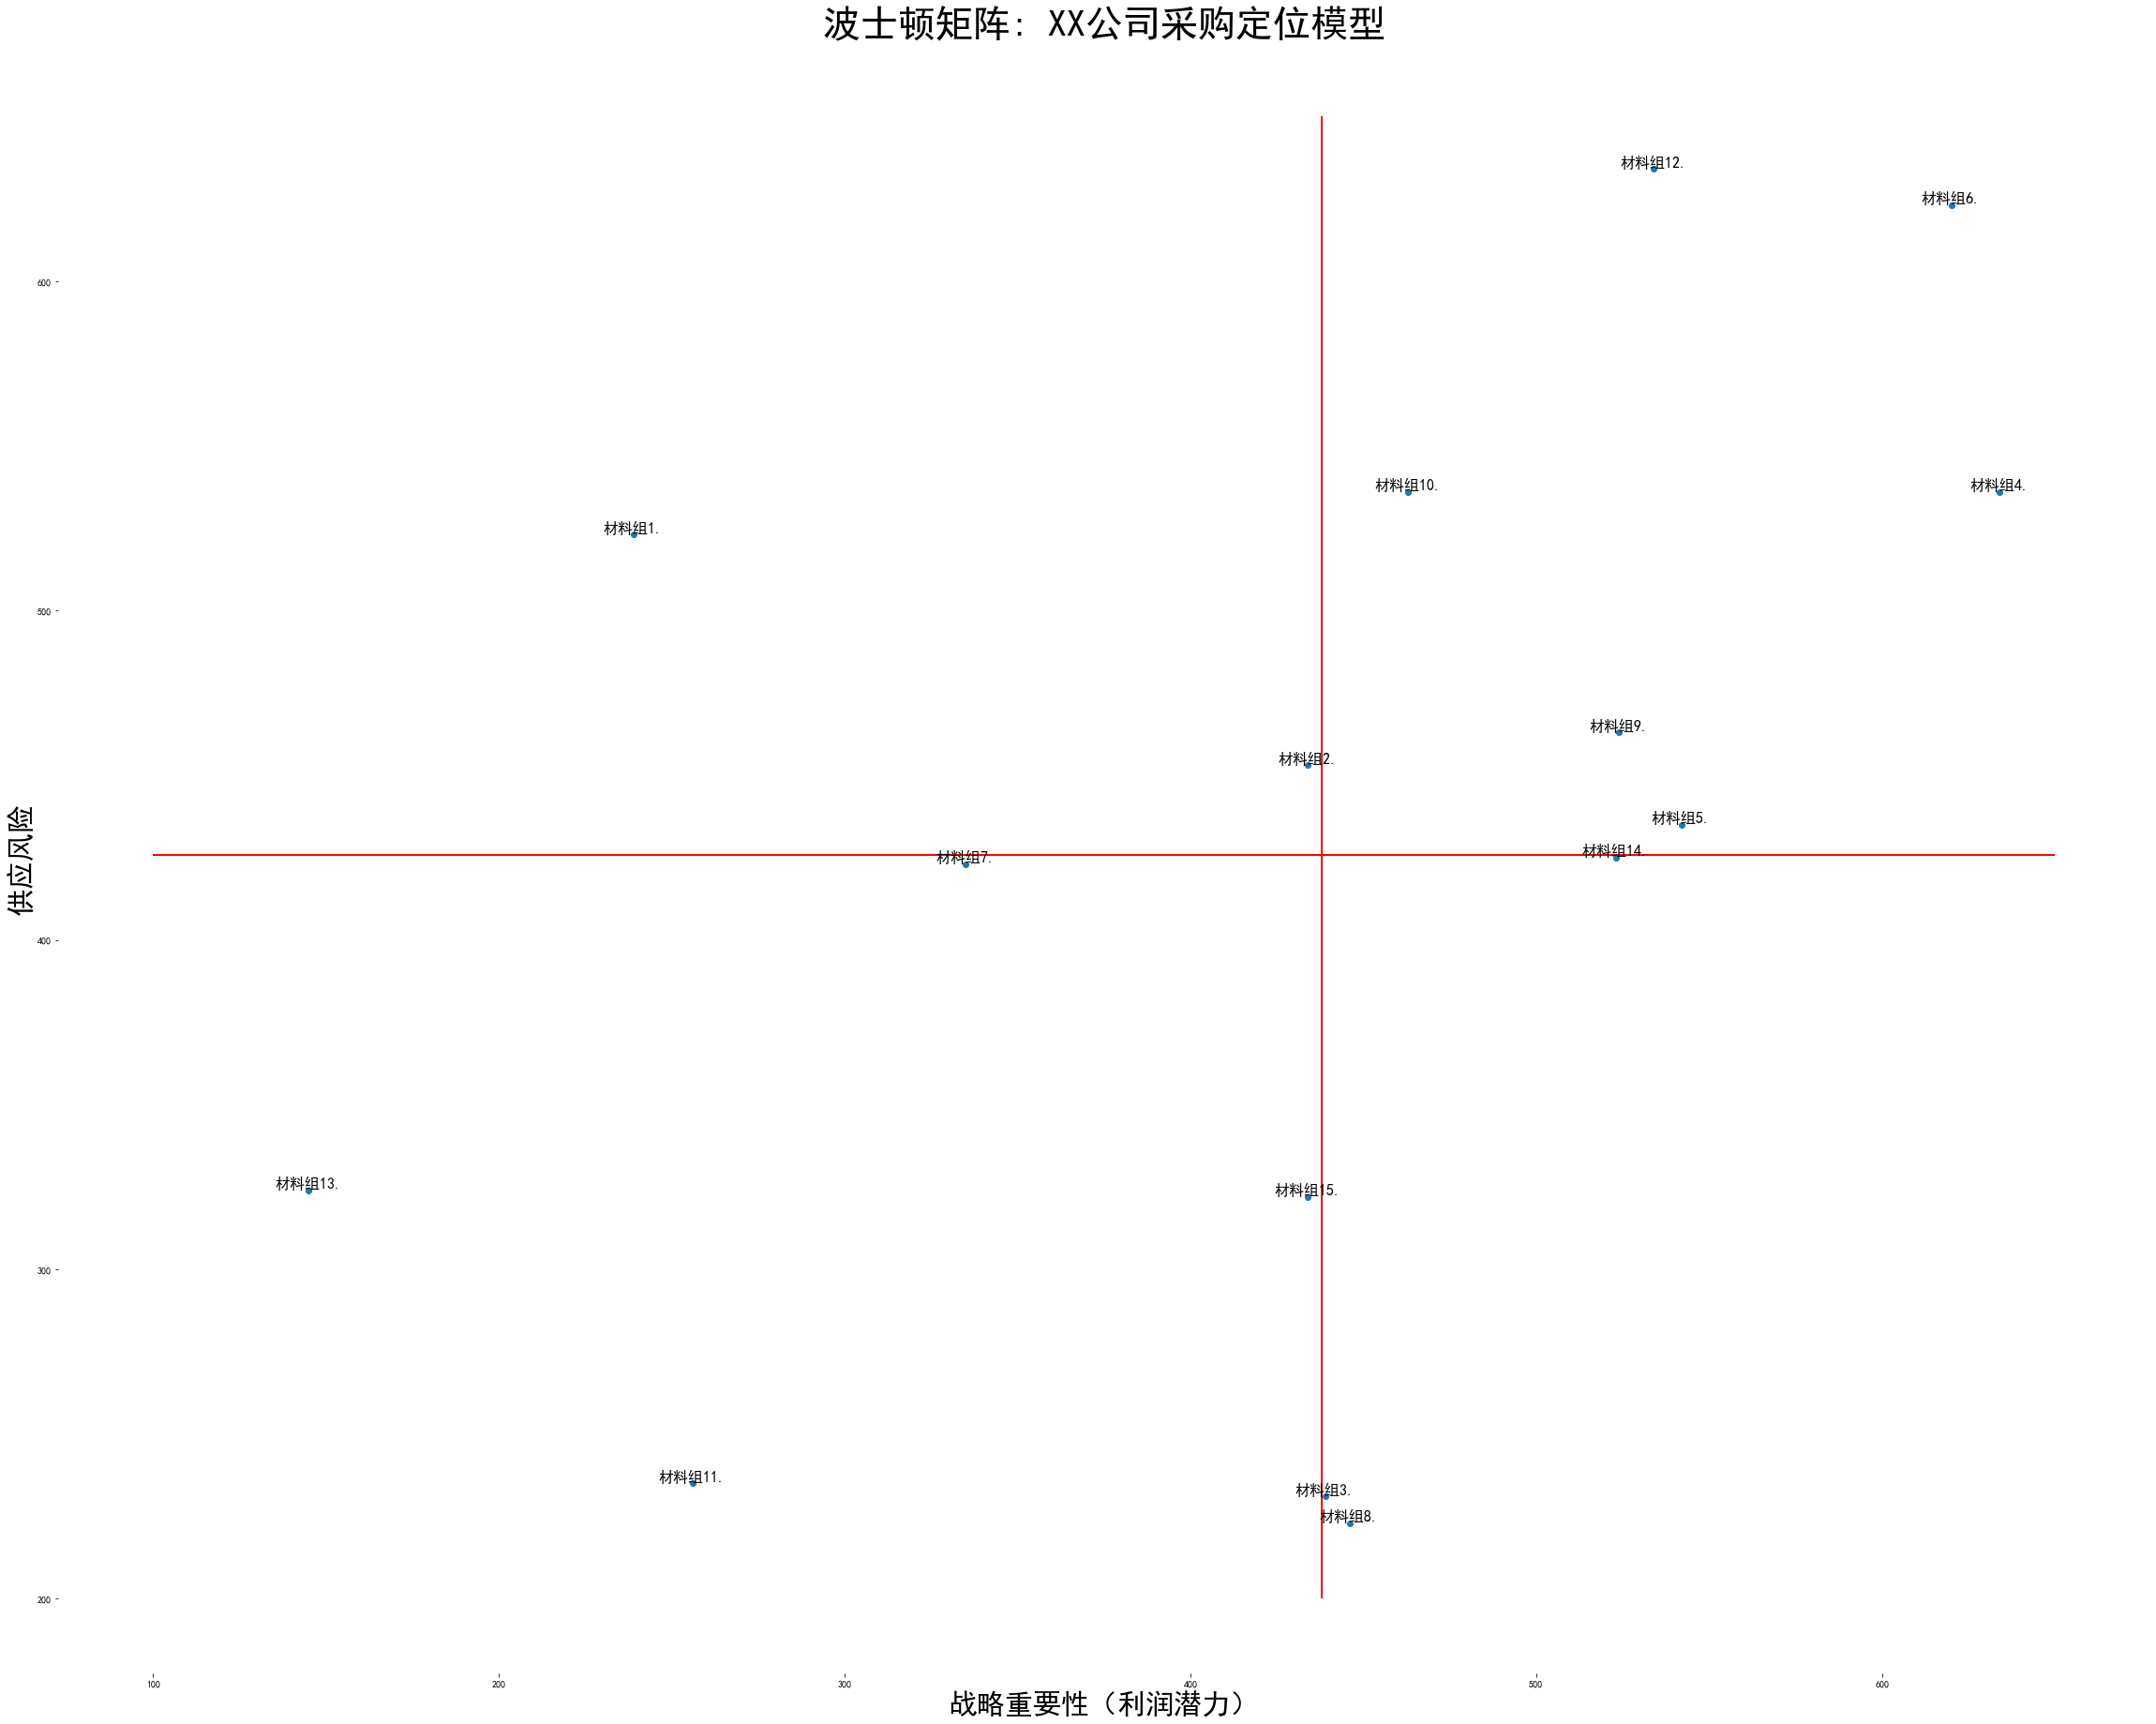

In [28]:
plt.figure(figsize=(40, 32))
x = df['money_woe']
y = df['risk_woe']
label = df['material_group_name']

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(x=df['money_woe'], y=df['risk_woe'])
plt.xlabel('战略重要性（利润潜力）', fontsize=30)
plt.ylabel('供应风险', fontsize=30)
plt.title('波士顿矩阵: XX公司采购定位模型', fontsize=40)

# 对散点图中的每一个点进行文字标注
 ## 固定代码，无需深究，拿来即用
for a, b, l in zip(df['money_woe'], df['risk_woe'], label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', fontsize=16)
    #  0.1 向上轻微偏移

# 添加特定分割线
 ## vlines: vertical 垂直于 x 轴的线，在变量'经济总量'的均值处开始画，
   ## y 轴的范围[1.5, 3]
plt.vlines(x=df['money_woe'].mean(), ymin=200, ymax=650,
          colors='r', linewidth=2)
plt.hlines(y=df['risk_woe'].mean(), xmin=100, xmax=650,
          colors='r', linewidth=2)
# 背景网格
# plt.grid(True)

# 定制需求：隐去四周的边框线条
sns.despine(trim=True, left=True, bottom=True)